In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import subprocess

In [2]:
hr = 0

levels = {}
for typeOfLevel in ["heightAboveGround", "heightAboveGroundLayer", "pressureFromGroundLayer", "isobaricInhPa", "isothermal"]:
    print(typeOfLevel)
    each_set_of_levels = []
    for fhr in [0, 6]:
        for suffix in ["sfc", "prs"]:
            output = subprocess.check_output([
                "grib_ls",
                "-p", "level,typeOfLevel",
                
                f"grib-store/hrrr.t00z.wrf{suffix}f{fhr:02d}.grib2",
            ]).decode()
        
            each_set_of_levels.append(
                set(
                    int(line.split()[0]) for line in output.splitlines()
                    if typeOfLevel in line
                )
            )
    levels[typeOfLevel] = sorted(set().union(*each_set_of_levels))
    print(levels[typeOfLevel])
    print()

heightAboveGround
[0, 2, 10, 80, 1000, 3000, 4000, 5000]

heightAboveGroundLayer
[0, 1000, 3000, 5000]

pressureFromGroundLayer
[9000, 18000, 25500, 40000]

isobaricInhPa
[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000, 1013]

isothermal
[253, 263]



In [3]:
#for level in levels["isobaricInhPa"]:
#    assert level in ds.isobaricInhPa.values.astype(int)

In [4]:
levels.pop("isobaricInhPa")

[50,
 75,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 325,
 350,
 375,
 400,
 425,
 450,
 475,
 500,
 525,
 550,
 575,
 600,
 625,
 650,
 675,
 700,
 725,
 750,
 775,
 800,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 1000,
 1013]

In [5]:
these_are_the_same = [
    "atmosphere",
    "cloudTop",
    "surface",
    "heightAboveGround",
    "isothermal",
    "pressureFromGroundLayer",
    "sigmaLayer",
    "meanSea",
    "atmosphereSingleLayer",
    "depthBelowLand",
    "isobaricLayer",
    "lowCloudLayer",
    "middleCloudLayer",
    "highCloudLayer",
    "cloudBase",
    "cloudCeiling",
    "nominalTop",
    "isothermZero",
    "highestTroposphericFreezing",
    "adiabaticCondensation",
    "equilibrium",
]


these_are_more_readily_in_prs = [
    "isobaricInhPa",
    "depthBelowLandLayer",
] 


In [6]:
stepTypes = {
    "surface": ["instant", "accum"],
}

In [7]:
keys = [
    'isobaricInhPa',
    'depthBelowLandLayer',
    'atmosphere',
    'cloudTop',
    'surface',
    'heightAboveGround',
    'isothermal',
    'pressureFromGroundLayer',
    'sigmaLayer',
    'meanSea',
    'heightAboveGroundLayer',
    'atmosphereSingleLayer',
    'depthBelowLand',
    'isobaricLayer',
    'lowCloudLayer',
    'middleCloudLayer',
    'highCloudLayer',
    'cloudBase',
    'cloudCeiling',
    'nominalTop',
    'isothermZero',
    'highestTroposphericFreezing',
    'adiabaticCondensation',
    'equilibrium',
]

In [8]:
typeOfLevel = keys[0]
print(typeOfLevel)
stepType = "instant"
level = [25500]

isobaricInhPa


In [9]:
def read_them(fbk):
    print(fbk)
    prs = xr.open_dataset(
        "grib-store/hrrr.t00z.wrfprsf00.grib2",
        engine="cfgrib",
        filter_by_keys=fbk,
        decode_timedelta=True,
    )
    
    sfc = xr.open_dataset(
        "grib-store/hrrr.t00z.wrfsfcf00.grib2",
        engine="cfgrib",
        filter_by_keys=fbk,
        decode_timedelta=True,
    )
    for key in prs.data_vars:
        if key not in sfc:
            print(f"\t{key} not in sfc")
        else:
            error = np.abs(prs[key]-sfc[key]).max().values
            if error > 0:
                print(f"\t{key}: {error}")

    print(f"\t{sorted(list(prs.data_vars))}")
    return prs, sfc

In [10]:
for typeOfLevel in sorted(keys):
    fbk = {"typeOfLevel": typeOfLevel}
    if typeOfLevel in levels:

        for level in levels[typeOfLevel]:
            fbk["level"] = level
            prs, sfc = read_them(fbk)
    elif typeOfLevel in stepTypes:
        for stepType in stepTypes[typeOfLevel]:
            fbk["stepType"] = stepType
            prs, sfc = read_them(fbk)
            
        
    else:
        prs, sfc = read_them(fbk)


{'typeOfLevel': 'adiabaticCondensation'}
	['gh']
{'typeOfLevel': 'atmosphere'}
	['ltng', 'refc', 'tcc', 'unknown', 'veril']
{'typeOfLevel': 'atmosphereSingleLayer'}
	['pwat', 'unknown']
{'typeOfLevel': 'cloudBase'}
	['gh', 'pcdb']
{'typeOfLevel': 'cloudCeiling'}
	['gh']
{'typeOfLevel': 'cloudTop'}
	['gh', 'pres', 'unknown']
{'typeOfLevel': 'depthBelowLand'}
	['mstav']
{'typeOfLevel': 'depthBelowLandLayer'}
	st not in sfc
	soilw not in sfc
	['soilw', 'st']
{'typeOfLevel': 'equilibrium'}
	['gh']
{'typeOfLevel': 'heightAboveGround', 'level': 0}
	[]
{'typeOfLevel': 'heightAboveGround', 'level': 2}
	['d2m', 'pt', 'r2', 'sh2', 't2m']
{'typeOfLevel': 'heightAboveGround', 'level': 10}
	['max_10si', 'u10', 'v10']
{'typeOfLevel': 'heightAboveGround', 'level': 80}
	['u', 'v']
{'typeOfLevel': 'heightAboveGround', 'level': 1000}
	['refd', 'unknown']
{'typeOfLevel': 'heightAboveGround', 'level': 3000}
	[]
{'typeOfLevel': 'heightAboveGround', 'level': 4000}
	['refd']
{'typeOfLevel': 'heightAboveGroun

skipping variable: paramId==156 shortName='gh'
Traceback (most recent call last):
  File "/Users/tsmith/miniconda3/envs/ufs2arco/lib/python3.11/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/tsmith/miniconda3/envs/ufs2arco/lib/python3.11/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  925.,  850.,  700.,  500.,  250.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  850.,  700.,  500.]))
skipping variable: paramId==130 shortName='t'
Traceback (most recent call last):
  File "/Users/tsmith/miniconda3/envs/ufs2arco/lib/python3.11/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/tsmith/miniconda3/envs/ufs2arco/lib/pytho

	['gh', 'pres', 'r']
{'typeOfLevel': 'isobaricInhPa'}
	gh not in sfc
	t not in sfc
	r not in sfc
	dpt not in sfc
	q not in sfc
	w not in sfc
	u: 19.27861785888672
	v: 17.633546829223633
	absv not in sfc
	clwmr not in sfc
	cice not in sfc
	rwmr not in sfc
	snmr not in sfc
	grle not in sfc
	['absv', 'cice', 'clwmr', 'dpt', 'gh', 'grle', 'q', 'r', 'rwmr', 'snmr', 't', 'u', 'v', 'w']
{'typeOfLevel': 'isobaricLayer'}
	['lftx']
{'typeOfLevel': 'isothermZero'}
	['gh', 'pres', 'r']
{'typeOfLevel': 'isothermal', 'level': 253}
	['gh']
{'typeOfLevel': 'isothermal', 'level': 263}
	['gh', 'refd']
{'typeOfLevel': 'lowCloudLayer'}
	['lcc']
{'typeOfLevel': 'meanSea'}
	['mslma']
{'typeOfLevel': 'middleCloudLayer'}
	['mcc']
{'typeOfLevel': 'nominalTop'}
	['SBT113', 'SBT114', 'SBT123', 'SBT124', 'unknown']
{'typeOfLevel': 'pressureFromGroundLayer', 'level': 9000}
	['cape', 'cin']
{'typeOfLevel': 'pressureFromGroundLayer', 'level': 18000}
	['cape', 'cin', 'lftx4']
{'typeOfLevel': 'pressureFromGroundLayer'

In [11]:
ds = xr.open_dataset(
    "grib-store/hrrr.t00z.wrfprsf06.grib2",
    engine="cfgrib",
    filter_by_keys={
        "typeOfLevel": "atmosphere",
        "stepType": "accum",
        #"level": level,
        #"paramId": 131,
        #"stepType": stepType,
    },
    decode_timedelta=True,
)

In [12]:
ds

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2025-06-03T16:38 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes...

## Here's what we got

In [13]:
typeOfLevels = [
    "atmosphere",
    "depthBelowLand",
    "depthBelowLandLayer",
    "heightAboveGround",
    "highCloudLayer",
    "isobaricInhPa",
    "lowCloudLayer",
    "meanSea",
    "middleCloudLayer",
    "surface",
]

In [14]:
extras = {
    "heightAboveGround": {"level": [2, 10, 80, 1000, 4000]},
    "surface": ["instant", "accum"],
}

In [15]:
%%time
hr = 0
fhr = 6

dslist = []
for typeOfLevel in typeOfLevels:
    fbk = {"typeOfLevel": typeOfLevel}
    if typeOfLevel == "heightAboveGround":
        for level in [2, 10, 80, 1000, 4000]:
            fbk["level"] = level
            prs = xr.open_dataset(
                f"grib-store/hrrr.t{hr:02d}z.wrfprsf{fhr:02d}.grib2",
                engine="cfgrib",
                filter_by_keys=fbk,
                decode_timedelta=True,
            )
            prs = prs.drop_vars("heightAboveGround")
            if "unknown" in prs:
                prs = prs.drop_vars("unknown")

            for key in ["aptmp", "tmax", "tmin", "pres", "t", "q", "u", "v", "pt", "refd"]:
                    if key in prs:
                        new = f"{key}{level}"
                        prs = prs.rename({key: new})
                        prs[new].attrs["long_name"] = f"{level} metre " + prs[new].attrs["long_name"]
                        prs[new].attrs["original_name"] = key
            for key in prs.data_vars:
                prs[key].attrs["GRIB_level"] = level
            dslist.append(prs) 
    elif typeOfLevel == "surface":
        for stepType in ["instant", "accum"]:
            fbk["stepType"] = stepType
            prs = xr.open_dataset(
                f"grib-store/hrrr.t{hr:02d}z.wrfprsf{fhr:02d}.grib2",
                engine="cfgrib",
                filter_by_keys=fbk,
                decode_timedelta=True,
            )
            if "unknown" in prs:
                prs = prs.drop_vars("unknown")
            if "t" in prs:
                prs = prs.rename({"t": "t_surface"})
                prs["t_surface"].attrs["original_name"] = "t"

            if stepType == "accum":
                varnames = list(prs.data_vars)
                for key in ["sdwe"]:
                    new = f"{key}_accum"
                    prs[key].attrs["long_name"] += f" accumulated over forecast"
                    prs[key].attrs["original_name"] = key
                    prs = prs.rename({key: new}) 
            dslist.append(prs)
    else:
        prs = xr.open_dataset(
            f"grib-store/hrrr.t{hr:02d}z.wrfprsf{fhr:02d}.grib2",
            engine="cfgrib",
            filter_by_keys=fbk,
            decode_timedelta=True,
        )
        if "unknown" in prs:
            prs = prs.drop_vars("unknown")
        dslist.append(prs)
        
        
ds = xr.merge(dslist)

CPU times: user 638 ms, sys: 45.4 ms, total: 684 ms
Wall time: 687 ms


In [16]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:              (y: 1059, x: 1799, depthBelowLandLayer: 9,
                          isobaricInhPa: 40)
Coordinates: (12/14)
    time                 datetime64[ns] 8B 2018-04-25
    step                 timedelta64[ns] 8B 06:00:00
    atmosphere           float64 8B ...
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2018-04-25T06:00:00
    ...                   ...
    highCloudLayer       float64 8B ...
  * isobaricInhPa        (isobaricInhPa) float64 320B 1.013e+03 1e+03 ... 50.0
    lowCloudLayer        float64 8B ...
    meanSea              float64 8B ...
    middleCloudLayer     float64 8B ...
    surface              float64 8B 0.0
Dimensions without coordinates: y, x
Data variables: (12/73)
    refc                 (y, x) float32 8MB ...
    veril                (y, x) float32 8MB ...
    ltng                 (y, x) float32 8MB ...
    tcc                  (y, x) float32 8MB ...
    mstav                (y, x) float32 8MB ...
    st                   (depthBelowLandLayer, y, x) float32 69MB ...
    ...                   ...
    lsm                  (y, x) float32 8MB ...
    siconc               (y, x) float32 8MB ...
    tp                   (y, x) float32 8MB ...
    sdwe_accum           (y, x) float32 8MB ...
    ssrun                (y, x) float32 8MB ...
    bgrun                (y, x) float32 8MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-03T16:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
bigdict = {}
for varname in sorted(ds.data_vars):
    bigdict[varname] = {
        "filter_by_keys": {
            "typeOfLevel": ds[varname].GRIB_typeOfLevel,
            "paramId": ds[varname].GRIB_paramId,
        },
        "long_name": ds[varname].long_name,
        "file_suffixes": ["prs"],
    }
    if ds[varname].GRIB_typeOfLevel == "heightAboveGround":
        bigdict[varname]["filter_by_keys"]["level"] = ds[varname].attrs["GRIB_level"]
    elif ds[varname].GRIB_typeOfLevel == "surface":
        bigdict[varname]["filter_by_keys"]["stepType"] = ds[varname].attrs["GRIB_stepType"]
    if "original_name" in ds[varname].attrs:
        bigdict[varname]["original_name"] = ds[varname].original_name
        

In [18]:
smallerdict = {k:v for k,v in bigdict.items() if k in ["lsm", "orog", "sp", "u10", "v10", "t2m", "sh2", "d2m", "gh", "u", "v", "w", "t", "q"]}

In [19]:
smallerdict

{'d2m': {'filter_by_keys': {'typeOfLevel': 'heightAboveGround',
   'paramId': 168,
   'level': 2},
  'long_name': '2 metre dewpoint temperature',
  'file_suffixes': ['prs']},
 'gh': {'filter_by_keys': {'typeOfLevel': 'isobaricInhPa', 'paramId': 156},
  'long_name': 'Geopotential height',
  'file_suffixes': ['prs']},
 'lsm': {'filter_by_keys': {'typeOfLevel': 'surface',
   'paramId': 172,
   'stepType': 'instant'},
  'long_name': 'Land-sea mask',
  'file_suffixes': ['prs']},
 'orog': {'filter_by_keys': {'typeOfLevel': 'surface',
   'paramId': 228002,
   'stepType': 'instant'},
  'long_name': 'Orography',
  'file_suffixes': ['prs']},
 'q': {'filter_by_keys': {'typeOfLevel': 'isobaricInhPa', 'paramId': 133},
  'long_name': 'Specific humidity',
  'file_suffixes': ['prs']},
 'sh2': {'filter_by_keys': {'typeOfLevel': 'heightAboveGround',
   'paramId': 174096,
   'level': 2},
  'long_name': '2 metre specific humidity',
  'file_suffixes': ['prs']},
 'sp': {'filter_by_keys': {'typeOfLevel': 'su

In [20]:
import yaml

In [21]:
with open("reference.hrrr.yaml", "w") as f:
    yaml.dump(smallerdict, f)

In [110]:
bigdict

{'absv': {'filter_by_keys': {'typeOfLevel': 'isobaricInhPa'},
  'long_name': 'Absolute vorticity',
  'file_suffix': ['prs']},
 'bgrun': {'filter_by_keys': {'typeOfLevel': 'surface', 'stepType': 'accum'},
  'long_name': 'Baseflow-groundwater runoff',
  'file_suffix': ['prs']},
 'blh': {'filter_by_keys': {'typeOfLevel': 'surface', 'stepType': 'instant'},
  'long_name': 'Boundary layer height',
  'file_suffix': ['prs']},
 'cape': {'filter_by_keys': {'typeOfLevel': 'surface', 'stepType': 'instant'},
  'long_name': 'Convective available potential energy',
  'file_suffix': ['prs']},
 'cfrzr': {'filter_by_keys': {'typeOfLevel': 'surface', 'stepType': 'instant'},
  'long_name': 'Categorical freezing rain',
  'file_suffix': ['prs']},
 'cice': {'filter_by_keys': {'typeOfLevel': 'isobaricInhPa'},
  'long_name': 'Cloud Ice',
  'file_suffix': ['prs']},
 'cicep': {'filter_by_keys': {'typeOfLevel': 'surface', 'stepType': 'instant'},
  'long_name': 'Categorical ice pellets',
  'file_suffix': ['prs']},

In [31]:
for key in sorted(ds.data_vars):
    print(f"{key}: {ds[key].long_name}")

absv: Absolute vorticity
bgrun_06hr: Baseflow-groundwater runoff accumulated over 06 hours
blh: Boundary layer height
cape: Convective available potential energy
cfrzr: Categorical freezing rain
cice: Cloud Ice
cicep: Categorical ice pellets
cin: Convective inhibition
clwmr: Cloud mixing ratio
cnwat: Plant canopy surface water
cpofp: Percent frozen precipitation
crain: Categorical rain
csnow: Categorical snow
d2m: 2 metre dewpoint temperature
dpt: Dew point temperature
fricv: Frictional velocity
fsr: Forecast surface roughness
gflux: Ground heat flux
gh: Geopotential height
grle: Graupel (snow pellets)
gust: Wind speed (gust)
hcc: High cloud cover
ishf: Instantaneous surface sensible heat net flux
lcc: Low cloud cover
lsm: Land-sea mask
ltng: Lightning
max_10si: Time-maximum 10 metre wind speed
mcc: Medium cloud cover
mslma: MSLP (MAPS System Reduction)
mstav: Moisture availability
orog: Orography
prate: Precipitation rate
pt2: 2 metre Potential temperature
q: Specific humidity
r: Rela

In [21]:
ds.hcc

<xarray.DataArray 'hcc' (y: 1059, x: 1799)> Size: 8MB
[1905141 values with dtype=float32]
Coordinates:
    time              datetime64[ns] 8B 2018-04-25
    step              timedelta64[ns] 8B 06:00:00
    atmosphere        float64 8B ...
    latitude          (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude         (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time        datetime64[ns] 8B 2018-04-25T06:00:00
    depthBelowLand    float64 8B ...
    highCloudLayer    float64 8B ...
    lowCloudLayer     float64 8B ...
    meanSea           float64 8B ...
    middleCloudLayer  float64 8B ...
    surface           float64 8B 0.0
Dimensions without coordinates: y, x
Attributes: (12/34)
    GRIB_paramId:                             3075
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         highCloudLayer
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                High cloud cover
    GRIB_shortName:                           hcc
    GRIB_units:                               %
    long_name:                                High cloud cover
    units:                                    %
    standard_name:                            unknown

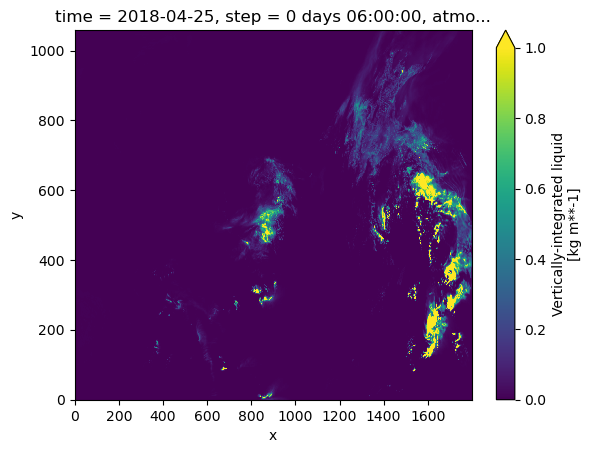

In [32]:
ds.veril.plot(vmax=1)

In [ ]:
ds.

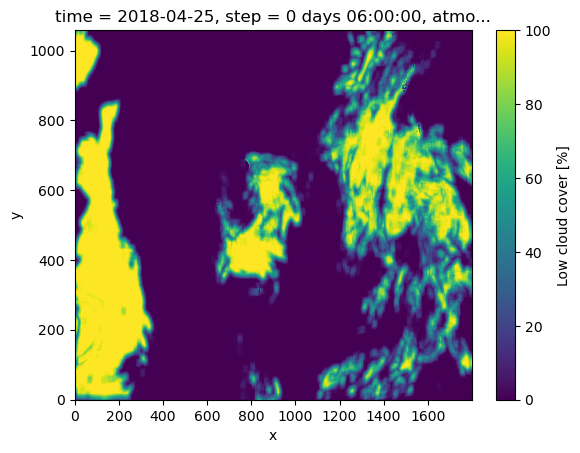

In [19]:
ds["lcc"].plot()

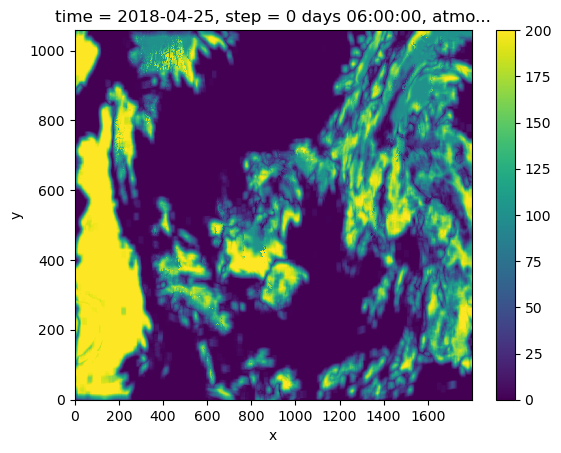

In [427]:
(ds.tcc*3 - (ds["lcc"] + ds["mcc"] + ds["hcc"])).plot()

In [414]:
ds

<xarray.Dataset> Size: 396MB
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] 8B 2018-04-25
    step        timedelta64[ns] 8B 00:00:00
    latitude    (y, x) float64 15MB 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude   (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time  datetime64[ns] 8B 2018-04-25
    surface     float64 8B 0.0
Dimensions without coordinates: y, x
Data variables: (12/48)
    t2m         (y, x) float32 8MB ...
    pt2         (y, x) float32 8MB ...
    sh2         (y, x) float32 8MB ...
    d2m         (y, x) float32 8MB ...
    r2          (y, x) float32 8MB ...
    u10         (y, x) float32 8MB ...
    ...          ...
    lsm         (y, x) float32 8MB ...
    siconc      (y, x) float32 8MB ...
    tp_00hr     (y, x) float32 8MB ...
    sdwe_00hr   (y, x) float32 8MB ...
    ssrun_00hr  (y, x) float32 8MB ...
    bgrun_00hr  (y, x) float32 8MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-05-28T16:44 GRIB to CDM+CF via cfgrib-0.9.1...